<a href="https://colab.research.google.com/github/MoAbeds/computer-Vision/blob/colabs/Fruits%26Vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          11951        364  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            927         68  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6926        199  0.9705882        

In [ ]:
!kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition -p /content/data/ --unzip

 29% 582M/1.98G [00:02<00:06, 225MB/s]

In [ ]:
!pip install pytorch-lightning torchmetrics --quiet


In [ ]:
!git clone https://github.com/MoAbeds/Pytorch-Lightning-Temp-.git

In [5]:
cd /content/Pytorch-Lightning-Temp-

/content/Pytorch-Lightning-Temp-


In [6]:
from data import FolderData
from model import LightModel
from utils import callbacks
from utils import Visualize

from pytorch_lightning import Trainer ,LightningModule

data_dir = '/content/data'
cb = callbacks.MyPrintingCallback()
logger = callbacks.TensorBoardLogger('Fruits_Vegetables')
save_check = callbacks.ModelCheckpoint()
Epochs = 5
Precision = 16
dm = FolderData.DataModule(data_dir)
dm.setup()
model = LightModel(val_length=dm.val_length)




trainer = Trainer(gpus=1,
                      benchmark=True,
                      max_epochs=Epochs,
                      precision=Precision,
                      callbacks=[cb, save_check],
                      check_val_every_n_epoch=1,
                      gradient_clip_val=8,
                      logger=logger)
trainer.fit(model, datamodule=dm)
trainer.test(model, dataloaders=dm.test_dataloader())








3115


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: Fruits_Vegetables/lightning_logs


3115


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GoogLeNet        | 5.7 M 
1 | criterion | CrossEntropyLoss | 0     
2 | accuracy  | Accuracy         | 0     
-----------------------------------------------
5.7 M     Trainable params
0         Non-trainable params
5.7 M     Total params
11.468    Total estimated model params size (MB)


===> Sanity check...


Sanity Checking: 0it [00:00, ?it/s]

Epoch 1 Train Loss: nan, Train Acc: nan


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Epoch 1 Val Loss: 4.875, Val Acc: 0.02


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1937: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

In training...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

Epoch 1 Train Loss: 4.087, Train Acc: 0.03
Epoch 1 Val Loss: 6.015, Val Acc: 0.03
Time spent for Epoch 1 -----> -4m 52s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 2 Train Loss: 3.753, Train Acc: 0.05
Epoch 2 Val Loss: 3.318, Val Acc: 0.09
Time spent for Epoch 2 -----> -3m 1s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 3 Train Loss: 3.574, Train Acc: 0.06
Epoch 3 Val Loss: 2.960, Val Acc: 0.12
Time spent for Epoch 3 -----> -3m 2s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 4 Train Loss: 3.443, Train Acc: 0.07
Epoch 4 Val Loss: 2.928, Val Acc: 0.10
Time spent for Epoch 4 -----> -3m 3s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 5 Train Loss: 3.330, Train Acc: 0.08
Epoch 5 Val Loss: 2.511, Val Acc: 0.20
Time spent for Epoch 5 -----> -3m 3s



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training completes in -----> -15m 1s
Best Validation Accuracy is 0.196
3115


Testing: 0it [00:00, ?it/s]

Got 72/359 correct samples.
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.20055709779262543
        test_loss           2.5014336109161377
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.20055709779262543, 'test_loss': 2.5014336109161377}]

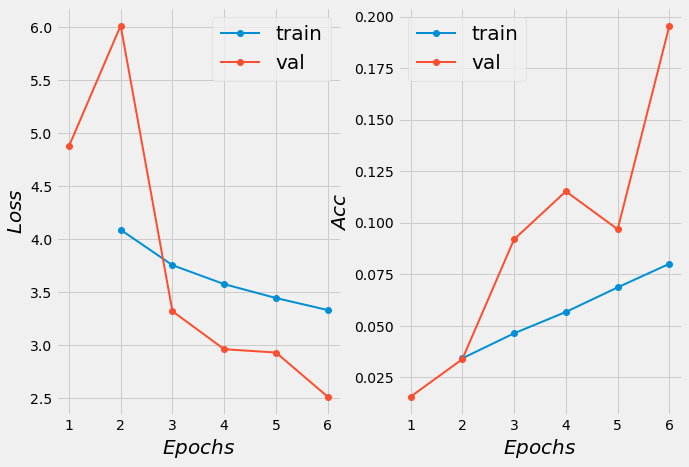

In [7]:
Visualize.visualize_cost(model.train_loss, model.train_acc, model.val_loss, model.val_acc)
